# <center><u>Machine Learning</u><center>
### Guilhamassé Quentin
### Quinveros Jordan

# Apprentissage supervisé

## Régression linéaire

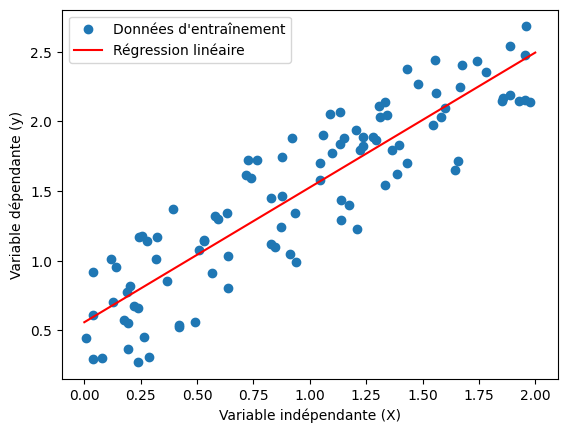

In [16]:
import numpy as np  # Importe la bibliothèque NumPy avec l'alias np
import matplotlib.pyplot as plt  # Importe la sous-bibliothèque pyplot de Matplotlib avec l'alias plt
from sklearn.linear_model import LinearRegression  # Importe la classe LinearRegression de scikit-learn

# Créez des données factices
np.random.seed(0)  # Fixe la graine du générateur de nombres aléatoires de NumPy à 0 pour la reproductibilité
X = 2 * np.random.rand(100, 1)  # Génère 100 valeurs aléatoires entre 0 et 2 pour la variable indépendante X
y = X + np.random.rand(100, 1)  # Génère des valeurs pour la variable dépendante y en fonction de X avec du bruit aléatoire

# Créez un modèle de régression linéaire
model = LinearRegression()  # Crée un objet modèle de régression linéaire

# Entraînez le modèle sur les données
model.fit(X, y)  # Entraîne le modèle en ajustant la régression linéaire aux données

# Faites des prédictions sur de nouvelles données
X_new = np.array([[0], [2]])  # Crée de nouvelles données pour lesquelles nous voulons faire des prédictions
y_pred = model.predict(X_new)  # Utilise le modèle pour prédire les valeurs de y pour les nouvelles données X_new

# Affichez les résultats
plt.scatter(X, y, label='Données d\'entraînement')  # Affiche un nuage de points pour les données d'entraînement
plt.plot(X_new, y_pred, 'r-', label='Régression linéaire')  # Trace la ligne de régression linéaire pour les nouvelles données
plt.xlabel('Variable indépendante (X)')  # Étiquette l'axe des x
plt.ylabel('Variable dépendante (y)')  # Étiquette l'axe des y
plt.legend()  # Ajoute une légende au graphique
plt.show()  # Affiche le graphique


## Arbre de décision

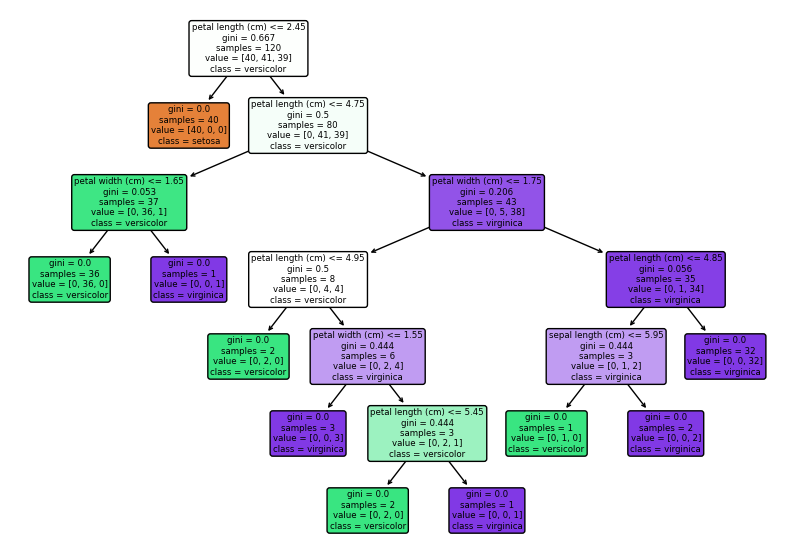

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Charger le jeu de données Iris (exemple intégré dans scikit-learn)
iris = load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Afficher l'arbre de décision
plt.figure(figsize=(10, 7))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()


# Apprentissage non supervisé

# Apprentissage par renforcement

## Q-Learning

Dans notre exemple:

- **num_states** est le nombre d'états dans l'environnement. 0 est l'état initial et 5 l'état final
  
- **num_actions** est le nombre d'actions possibles que l'agent peut entreprendre dans chaque état. Dans notre exemple, il y a 2 actions possibles : "restez sur place" (0) et "déplacez-vous vers la droite" (1).

- **alpha** est le taux d'apprentissage. Il contrôle dans quelle mesure les nouvelles informations influent sur les estimations existantes dans la Q-table lors de la mise à jour. Un taux d'apprentissage élevé signifie que l'agent accorde plus de poids aux nouvelles informations, tandis qu'un taux d'apprentissage bas signifie que l'agent conserve davantage les informations précédentes.

- **gamma** est le facteur d'escompte. Il contrôle l'importance relative des récompences immédiates par rapport aux récompences futures. Un Y proche de 0 signifie que l'agent se soucie principalement des récompences immédiates, tandis qu'un Y proche de 1 signifie que l'agent accorde une importance significative aux récompences futures. En d'autres termes, il indique à quel point l'agent est "patient" dans la recherche de récompenses.

- **epsilon** est la probabilité d'exploration. Lors de la sélection d'actions, l'agent utilise une politique epsilon-greedy. Avec une probabilité ϵ, l'agent choisit une action au hasard (exploration), et avec une probabilité 1 - ϵ, il choisit l'action avec la plus grande valeur Q (exploitation). Cette approche permet à l'agent d'explorer différentes actions tout en exploitant ses connaissances actuelles. Un ϵ faible favorise l'exploitation, tandis qu'un ϵ élevé favorise l'exploration.

Q-table finale:
[[0.58359022 0.6561    ]
 [0.65343385 0.729     ]
 [0.72447148 0.81      ]
 [0.79485564 0.9       ]
 [0.89310161 1.        ]
 [0.         0.        ]]


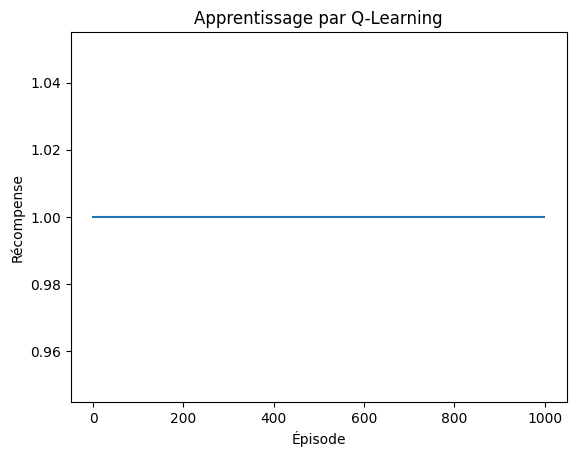

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
num_states = 6
num_actions = 2
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur d'escompte
epsilon = 0.1  # Probabilité d'exploration

# Initialisation de la Q-table
Q = np.zeros((num_states, num_actions))

# Simulation de l'environnement
num_episodes = 1000
rewards = []

for episode in range(num_episodes):
    state = 0  # État initial

    while state != num_states - 1:  # Tant que l'état final n'est pas atteint
        # Politique epsilon-greedy pour choisir une action
        if np.random.rand() < epsilon:
            action = np.random.randint(num_actions)  # Exploration
        else:
            action = np.argmax(Q[state, :])  # Exploitation

        # Simulation de l'environnement et observation de la récompense
        next_state = state + 1 if action == 1 else state  # Déplacement vers la droite
        reward = 1 if next_state == num_states - 1 else 0  # Récompense 1 à l'état final, sinon 0

        # Mise à jour de la Q-table
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        # Transition vers le nouvel état
        state = next_state

    rewards.append(reward)

# Affichage des résultats
print("Q-table finale:")
print(Q)

# Tracé des récompenses au fil des épisodes
plt.plot(rewards)
plt.xlabel("Épisode")
plt.ylabel("Récompense")
plt.title("Apprentissage par Q-Learning")
plt.show()
